# Housing Price Prediction using a Neural Network

## Objective
In this exercise, you will:
1. Create a synthetic dataset for housing prices based on a linear equation.
2. Build and train a simple neural network with one neuron to predict housing prices.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

---

## Step 2: Create a Synthetic Dataset
We will create a dataset for housing prices that follows the equation

$\text{price}$ = $\text{number of bedrooms}$ $\times  x$ + $\text{base price}$


In [2]:
# Number of samples
n_samples = 1000

# Generate random number of bedrooms between 1 and 5
bedrooms = np.random.randint(1, 6, n_samples)

# Constants for the equation
x = 0.5  # The price added per bedroom in onehundred thousands
base_price = 1  # Base price of a house in onehundred thousands

# Generate housing prices based on the equation
prices = bedrooms * x + base_price

# Create a DataFrame
df = pd.DataFrame({'bedrooms': bedrooms, 'price': prices})

# Show the first few rows
df.head()

,bedrooms,price
0,3,2.5
1,4,3.0
2,3,2.5
3,5,3.5
4,1,1.5


---

## Step 3: Visualize the Data
Plot the data to visualize the relationship between the number of bedrooms and the price.


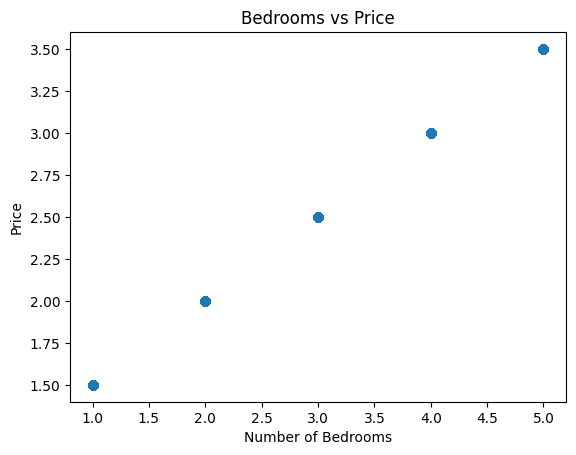

In [3]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.show()


---

## Step 4: Preprocess the Data
Split the data into features (`X`) and labels (`y`), and then into training and testing sets.


In [5]:
from sklearn.model_selection import train_test_split
# Features and Labels
X = df[['bedrooms']]
y = df['price']

# TODO Split the data
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

## Step 5: Build a Neural Network
Build a simple neural network with one neuron to predict the house prices.
Pick an optimizer and a loss function that suits this problem.


In [6]:
# TODO Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),  # Input layer is now part of the layers list
    tf.keras.layers.Dense(units=1)
])

# TODO Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# TODO print a Summary of the model

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

---

## Step 6: Train the Model
Train the model using the training data.


In [7]:
# TODO Train the model
model.fit(X_train, y_train, epochs=10, verbose=0)

---

## Step 7: Evaluate the Model
Evaluate the model using the test data and plot its prediction.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


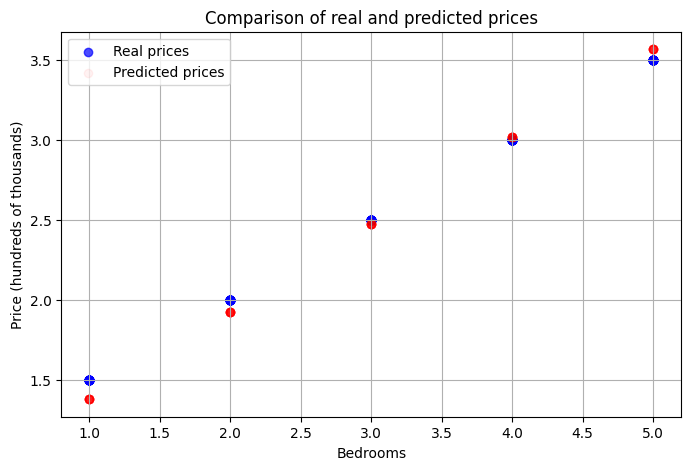

In [9]:
# TODO Evaluate the model using the model.evaluate() function
loss = model.evaluate(X_test, y_test)

# TODO Make predictions
y_pred = model.predict(X_test)

# TODO Plot real vs predicted prices (hint: you can use the plotting code from above as a start)

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Real prices', alpha =0.7)
plt.scatter(X_test, y_pred, color='red', label='Predicted prices', alpha =0.05)
plt.xlabel('Bedrooms')
plt.ylabel('Price (hundreds of thousands)')
plt.title('Comparison of real and predicted prices')
plt.legend()
plt.grid(True)
plt.show()


# Step 8: Optional
Go back to the start and experiment what happens if instead of representing a price of a house costing onehundred thousand by a 1 we use the raw number 100,000 instead.

Try to explain what happened and why.